<a href="https://colab.research.google.com/github/np-shishir/ml1/blob/main/Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
df=pd.read_csv('wine_data.csv', header=None, usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']
df.sample(5 )

,Class label,Alcohol,Malic acid
141,3,13.36,2.56
102,2,12.34,2.45
43,1,13.24,3.98
54,1,13.74,1.67
23,1,12.85,1.60


<Axes: xlabel='Alcohol', ylabel='Density'>

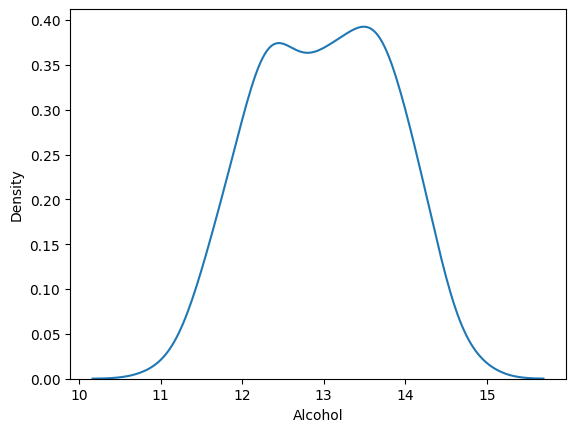

In [18]:
sns.kdeplot(data=df, x='Alcohol')

<Axes: xlabel='Malic acid', ylabel='Density'>

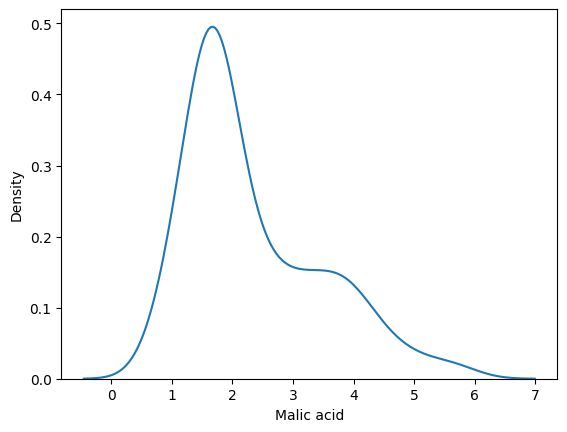

In [19]:
sns.kdeplot(data=df, x='Malic acid')

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

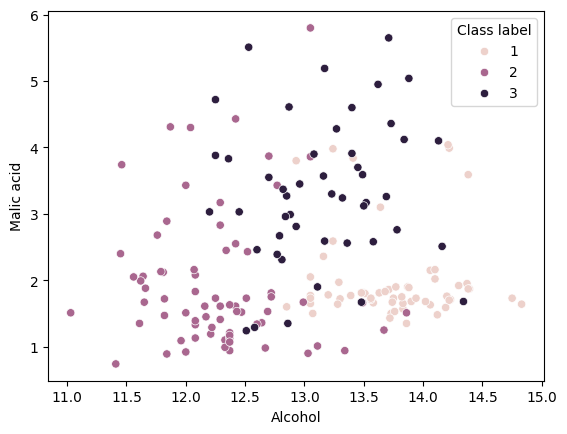

In [20]:
sns.scatterplot(data=df, x='Alcohol', y='Malic acid', hue='Class label')

In [21]:
df2=df
df2.sample(5)

,Class label,Alcohol,Malic acid
2,1,13.16,2.36
168,3,13.58,2.58
18,1,14.19,1.59
95,2,12.47,1.52
46,1,14.38,3.59


In [22]:
X=df2.iloc[:,1:]
X.sample(5)

,Alcohol,Malic acid
11,14.12,1.48
24,13.50,1.81
116,11.82,1.47
147,12.87,4.61
113,11.41,0.74


In [23]:
y=df2.iloc[:, :1]
y.sample(5)

,Class label
71,2
175,3
75,2
19,1
7,1


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()


#train using training data only
scaler.fit(X_train)

#scale both training and testing data; the data are numpy array
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [27]:
np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [28]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


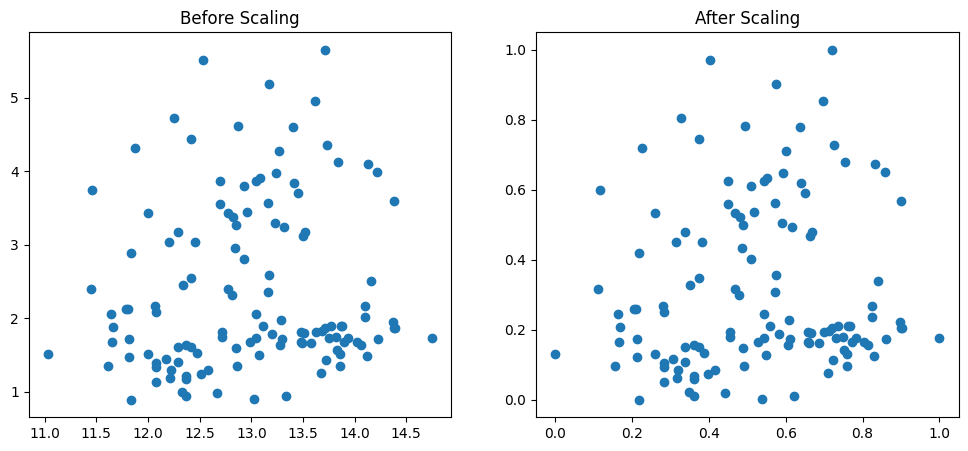

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'])
ax2.set_title("After Scaling")
plt.show()